In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거
warnings.filterwarnings("ignore", message="Could not find the number of physical cores")

# ! pip install openpyxl
! pip install statsmodels


     ---------------------------------------- 9.9/9.9 MB 15.8 MB/s eta 0:00:00
     ---------------------------------------- 232.9/232.9 KB ? eta 0:00:00


You should consider upgrading via the 'C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## hw_11_2

In [3]:
# %%
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
file_path = "data/data.csv"  
df = pd.read_csv(file_path)

# 데이터 확인 (상위 5개 행 출력)
print(df.info())  # 데이터 타입 및 결측값 확인
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구별(1)  29 non-null     object
 1   자치구별(2)  29 non-null     object
 2   2023     29 non-null     object
 3   2023.1   29 non-null     object
 4   2023.2   29 non-null     object
 5   2023.3   29 non-null     object
 6   2023.4   29 non-null     object
 7   2023.5   29 non-null     object
 8   2023.6   29 non-null     object
 9   2023.7   29 non-null     object
 10  2023.8   29 non-null     object
 11  2023.9   29 non-null     object
 12  2023.10  29 non-null     object
 13  2023.11  29 non-null     object
 14  2023.12  29 non-null     object
 15  2023.13  29 non-null     object
 16  2023.14  29 non-null     object
dtypes: object(17)
memory usage: 4.0+ KB
None


,자치구별(1),자치구별(2),2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7,2023.8,2023.9,2023.10,2023.11,2023.12,2023.13,2023.14
0,자치구별(1),자치구별(2),전체,전체,전체,전체,전체,전체,전체,전체,전체,전체,전체,전체,전체,전체,전체
1,자치구별(1),자치구별(2),소계,소계,소계,소계,소계,비사업용차량,비사업용차량,비사업용차량,비사업용차량,비사업용차량,사업용차량,사업용차량,사업용차량,사업용차량,사업용차량
2,자치구별(1),자치구별(2),계,승용차,승합차,화물차,특수차,계,승용차,승합차,화물차,특수차,계,승용차,승합차,화물차,특수차
3,전체,소계,37740685,29896258,1813153,5845215,186060,30537843,26202684,931310,3351547,52302,7202842,3693574,881843,2493667,133758
4,전체,종로구,557468,404004,42625,103260,7580,464195,384867,30634,47918,776,93273,19137,11991,55342,6804


In [4]:
# %%
# 특정 두 자치구(예: 종로구 vs 강남구) 데이터 필터링
df_filtered = df[df['자치구별(2)'].isin(['종로구', '강남구'])]  
# 원하는 자치구만 선택

# 필요한 컬럼 선택 (2023년 1월~12월)
df_filtered = df_filtered[['자치구별(2)', '2023.1', '2023.2', '2023.3', '2023.4', '2023.5', '2023.6', 
                           '2023.7', '2023.8', '2023.9', '2023.10', '2023.11', '2023.12']]

df_filtered.columns = ['자치구', 'car_1', 'car_2', 'car_3', 'car_4', 'car_5', 'car_6', 
                       'car_7', 'car_8', 'car_9', 'car_10', 'car_11', 'car_12']

# 데이터 타입 변환 (문자 → 숫자)
df_filtered.iloc[:, 1:] = df_filtered.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')  
# 숫자로 변환 (문자열이 있으면 NaN 처리)

df_filtered

,자치구,car_1,car_2,car_3,car_4,car_5,car_6,car_7,car_8,car_9,car_10,car_11,car_12
4,종로구,404004,42625,103260,7580,464195,384867,30634,47918,776,93273,19137,11991
26,강남구,2628074,73301,250256,8889,2178788,1977378,39466,158297,3647,781732,650696,33834


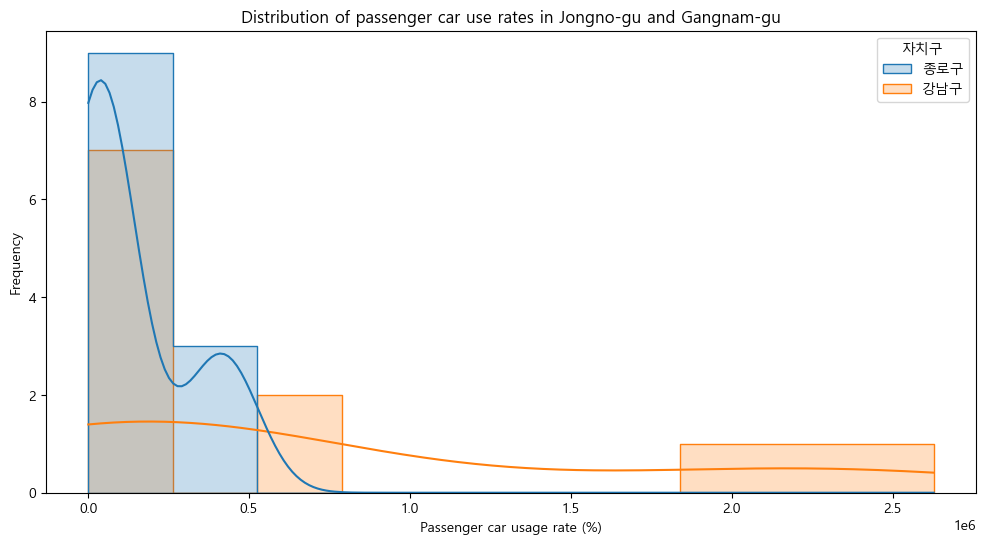

In [ ]:
# 데이터 변형: 자치구 데이터를 개별적인 관측값으로 변환
# squeeze메서드는 차원을 축소(압축)하는 메서드입니다. 
# 예를들어 한개의 행이나 열만 있는 DataFrame을 squeeze하면 Series 객체가 되며, 
# 1개 인덱스만 있는 Series를 squeeze하면 스칼라값이 됩니다. 
# 마찬가지로 1행,1열만 있는 DataFrame 객체를 squeeze하면 스칼라 값이 됩니다.
df_jongro = pd.to_numeric(df_filtered[df_filtered['자치구'] == '종로구'].iloc[:, 1:].T.squeeze(), errors='coerce')  
df_gangnam = pd.to_numeric(df_filtered[df_filtered['자치구'] == '강남구'].iloc[:, 1:].T.squeeze(), errors='coerce')  

# NaN 값 제거
df_jongro.dropna()  
df_gangnam.dropna()  

# %%
# 데이터 시각화
df_plot = pd.DataFrame({'자치구': ['종로구']*len(df_jongro) + ['강남구']*len(df_gangnam),
                        '승용차 이용 비율': np.concatenate([df_jongro.values, df_gangnam.values])})  
# 두 개의 데이터셋을 하나로 합침

plt.figure(figsize=(12, 6))
# 그래프 크기 설정

sns.histplot(data=df_plot, x='승용차 이용 비율', hue='자치구', kde=True, bins=10, element='step', common_norm=False)  
# 히스토그램 및 KDE 그래프

plt.title('Distribution of passenger car use rates in Jongno-gu and Gangnam-gu')  
plt.xlabel('Passenger car usage rate (%)')  
plt.ylabel('Frequency')  
# 이미 Seaborn이 hue 기준으로 범례를 자동 생성해줍니다.
# 여기서 legend까지 사용한다면, Seaborn의 자동 hue 처리를 오히려 방해
# plt.legend()  
plt.show()

In [7]:
# %%
# 정규성 검정 (Shapiro-Wilk test)
shapiro_jongro = stats.shapiro(df_jongro)  
# 정규성 검정 수행

shapiro_gangnam = stats.shapiro(df_gangnam)  

print(f"Shapiro-Wilk test (종로구): p-value = {shapiro_jongro.pvalue:.4f}")  
print(f"Shapiro-Wilk test (강남구): p-value = {shapiro_gangnam.pvalue:.4f}")  

# 등분산 검정 (Levene’s test)
levene_test = stats.levene(df_jongro, df_gangnam)  
# 등분산 검정 수행

print(f"Levene’s 등분산 검정 p-value: {levene_test.pvalue:.4f}")  


# %%
# 등분산을 가정한 독립표본 t-검정
t_stat, p_value = stats.ttest_ind(df_jongro, df_gangnam, equal_var=True)  
# 등분산을 가정한 t-검정 수행

print(f"t-통계량: {t_stat:.4f}, p-value: {p_value:.4f}")  

# 등분산을 가정하지 않는 Welch’s t-test 수행
t_stat_welch, p_value_welch = stats.ttest_ind(df_jongro, df_gangnam, equal_var=False)  
# Welch’s t-test 수행

print(f"Welch’s t-test 결과: t-통계량 = {t_stat_welch:.4f}, p-value = {p_value_welch:.4f}")  

# 비모수 검정 수행 (Mann-Whitney U test)
u_stat, p_value_mwu = stats.mannwhitneyu(df_jongro, df_gangnam, alternative='two-sided')  
# Mann-Whitney U 검정 수행

print(f"Mann-Whitney U test 결과: U-통계량 = {u_stat:.4f}, p-value = {p_value_mwu:.4f}")  

Shapiro-Wilk test (종로구): p-value = 0.0014
Shapiro-Wilk test (강남구): p-value = 0.0032
Levene’s 등분산 검정 p-value: 0.0353
t-통계량: -2.1097, p-value: 0.0465
Welch’s t-test 결과: t-통계량 = -2.1097, p-value = 0.0571
Mann-Whitney U test 결과: U-통계량 = 46.0000, p-value = 0.1410


## hw_11_4

In [9]:
# %%
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 데이터 불러오기
file_path = "data/data.csv"
# 파일 경로 입력

df = pd.read_csv(file_path)  
# CSV 파일 읽기

print(df.info())  
# 데이터 타입 및 결측값 확인

# 데이터 확인 (상위 5개 행 출력)
df.head()
# 데이터프레임의 상위 5개 행 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구별(1)  29 non-null     object
 1   자치구별(2)  29 non-null     object
 2   2023     29 non-null     object
 3   2023.1   29 non-null     object
 4   2023.2   29 non-null     object
 5   2023.3   29 non-null     object
 6   2023.4   29 non-null     object
 7   2023.5   29 non-null     object
 8   2023.6   29 non-null     object
 9   2023.7   29 non-null     object
 10  2023.8   29 non-null     object
 11  2023.9   29 non-null     object
 12  2023.10  29 non-null     object
 13  2023.11  29 non-null     object
 14  2023.12  29 non-null     object
 15  2023.13  29 non-null     object
 16  2023.14  29 non-null     object
dtypes: object(17)
memory usage: 4.0+ KB
None


,자치구별(1),자치구별(2),2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7,2023.8,2023.9,2023.10,2023.11,2023.12,2023.13,2023.14
0,자치구별(1),자치구별(2),전체,전체,전체,전체,전체,전체,전체,전체,전체,전체,전체,전체,전체,전체,전체
1,자치구별(1),자치구별(2),소계,소계,소계,소계,소계,비사업용차량,비사업용차량,비사업용차량,비사업용차량,비사업용차량,사업용차량,사업용차량,사업용차량,사업용차량,사업용차량
2,자치구별(1),자치구별(2),계,승용차,승합차,화물차,특수차,계,승용차,승합차,화물차,특수차,계,승용차,승합차,화물차,특수차
3,전체,소계,37740685,29896258,1813153,5845215,186060,30537843,26202684,931310,3351547,52302,7202842,3693574,881843,2493667,133758
4,전체,종로구,557468,404004,42625,103260,7580,464195,384867,30634,47918,776,93273,19137,11991,55342,6804


In [18]:
# %%
# 특정 세 자치구(예: 강남구, 종로구, 서초구) 데이터 필터링
df_filtered = df[df['자치구별(2)'].isin(['강남구', '종로구', '서초구'])]  
# 원하는 자치구만 선택

# 필요한 컬럼 선택 (2023년 1월~12월)
df_filtered = df_filtered[['자치구별(2)', '2023.1', '2023.2', '2023.3', '2023.4', '2023.5', '2023.6', 
                           '2023.7', '2023.8', '2023.9', '2023.10', '2023.11', '2023.12']]

df_filtered.columns = ['자치구', 'car_1', 'car_2', 'car_3', 'car_4', 'car_5', 'car_6', 
                       'car_7', 'car_8', 'car_9', 'car_10', 'car_11', 'car_12']

# 데이터 타입 변환 (문자 → 숫자)
df_filtered.iloc[:, 1:] = df_filtered.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')  
# 숫자로 변환 (문자열이 있으면 NaN 처리)

# 데이터 변형: 자치구 데이터를 개별적인 관측값으로 변환
# iterrows 메서드는 데이터의 행-열/데이터 정보를 튜플 형태의 generator 객체로 반환하는 메서드입니다.
# (행 이름, 내용의 Series객체) 형태로 반환하는데, Series객체는 열 - 값 형태로 반환
data_list = []
for idx, row in df_filtered.iterrows():
    for col in df_filtered.columns[1:]:
        data_list.append([row['자치구'], row[col]])

df_long = pd.DataFrame(data_list, columns=['자치구', '승용차 이용 비율'])
df_long

,자치구,승용차 이용 비율
0,종로구,404004
1,종로구,42625
2,종로구,103260
3,종로구,7580
4,종로구,464195
5,종로구,384867
6,종로구,30634
7,종로구,47918
8,종로구,776
9,종로구,93273


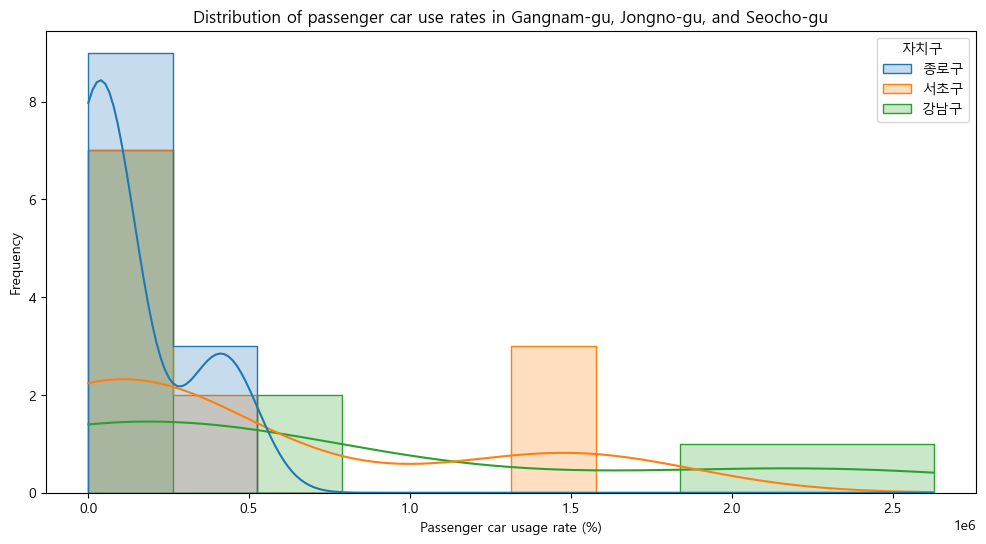

In [20]:
# %%
plt.figure(figsize=(12, 6))  
# 그래프 크기 설정

sns.histplot(data=df_long, x='승용차 이용 비율', hue='자치구', kde=True, bins=10, element='step', common_norm=False)  
# 히스토그램 및 KDE 그래프

plt.title('Distribution of passenger car use rates in Gangnam-gu, Jongno-gu, and Seocho-gu')  
plt.xlabel('Passenger car usage rate (%)')  
plt.ylabel('Frequency')  
# plt.legend()  
plt.show()

In [21]:
# %%
# 정규성 검정 (Shapiro-Wilk test)
for region in ['강남구', '종로구', '서초구']:  
    # 검정할 자치구 리스트 입력

    stat, p = stats.shapiro(df_long[df_long['자치구'] == region]['승용차 이용 비율'].dropna())  
    # 정규성 검정 수행

    print(f"Shapiro-Wilk test ({region}): p-value = {p:.4f}")

# 등분산 검정 (Levene’s test)
levene_test = stats.levene(
    df_long[df_long['자치구'] == '강남구']['승용차 이용 비율'].dropna(),
    df_long[df_long['자치구'] == '종로구']['승용차 이용 비율'].dropna(),
    df_long[df_long['자치구'] == '서초구']['승용차 이용 비율'].dropna()
)
# 여러 그룹의 등분산 검정 수행

print(f"Levene’s 등분산 검정 p-value: {levene_test.pvalue:.4f}")


# %%
# ANOVA 수행
anova_result = stats.f_oneway(
    df_long[df_long['자치구'] == '강남구']['승용차 이용 비율'].dropna(),
    df_long[df_long['자치구'] == '종로구']['승용차 이용 비율'].dropna(),
    df_long[df_long['자치구'] == '서초구']['승용차 이용 비율'].dropna()
)
# 일원분산분석(ANOVA) 수행

print(f"One-Way ANOVA 결과: F-통계량 = {anova_result.statistic:.4f}, p-value = {anova_result.pvalue:.4f}")

Shapiro-Wilk test (강남구): p-value = 0.0032
Shapiro-Wilk test (종로구): p-value = 0.0014
Shapiro-Wilk test (서초구): p-value = 0.0008
Levene’s 등분산 검정 p-value: 0.0896
One-Way ANOVA 결과: F-통계량 = 2.3647, p-value = 0.1097
